<a href="https://colab.research.google.com/github/dedeepya07/Brain-Stroke-Prediction-using-ML-Models/blob/main/Brain_Stroke_Prediction_using_ML_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load dataset
data = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

# Show first few rows of the dataset
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


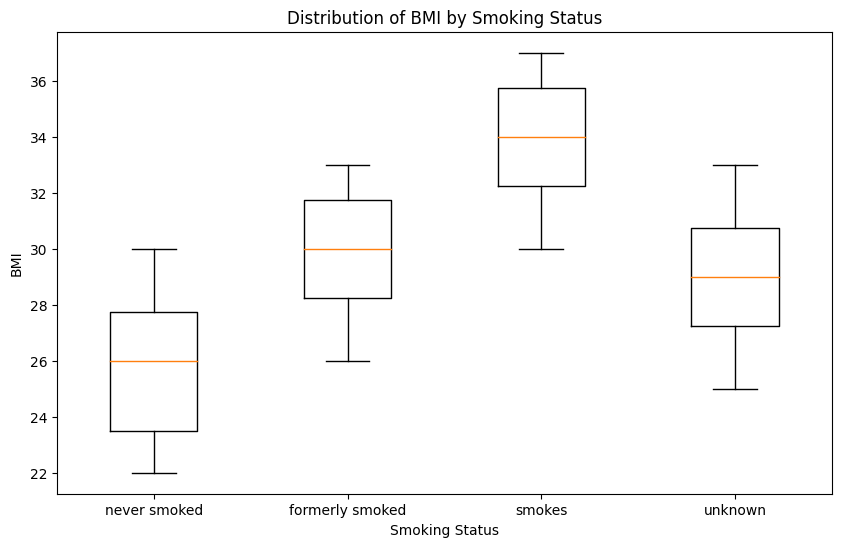

In [2]:
# @title Distribution of BMI by Smoking Status

import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
smoking_status = ['never smoked', 'formerly smoked', 'smokes', 'unknown']
bmi_data = {
    'never smoked': [23, 25, 28, 30, 22, 27],
    'formerly smoked': [26, 29, 32, 31, 28, 33],
    'smokes': [30, 33, 35, 37, 32, 36],
    'unknown': [25, 28, 31, 33, 27, 30]
}

# Create the box plot
plt.figure(figsize=(10, 6))
plt.boxplot([bmi_data[status] for status in smoking_status], labels=smoking_status)
plt.xlabel('Smoking Status')
plt.ylabel('BMI')
_ = plt.title('Distribution of BMI by Smoking Status')

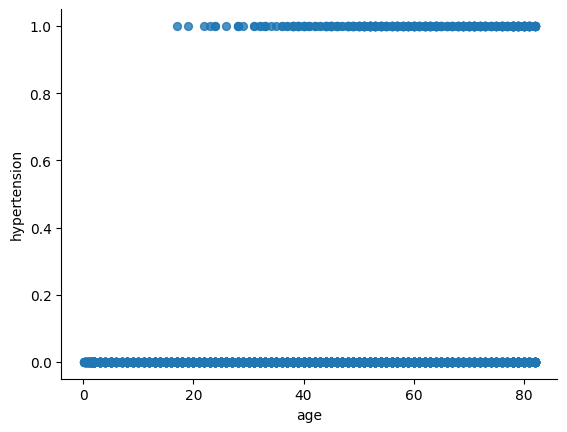

In [3]:

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='age', y='hypertension', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

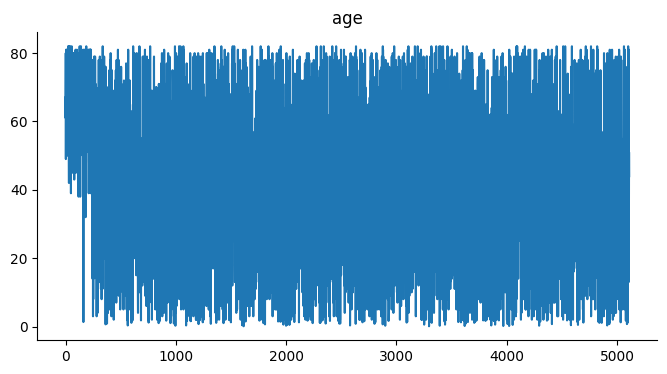

In [4]:

from matplotlib import pyplot as plt
data['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

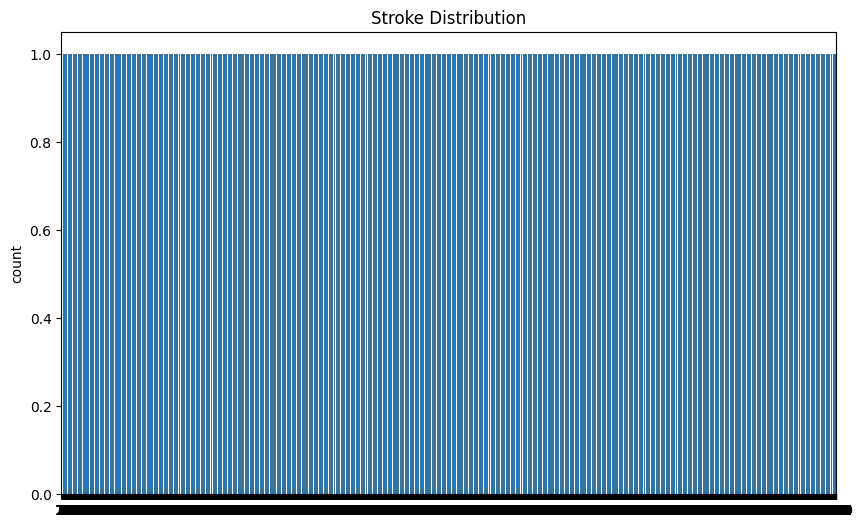

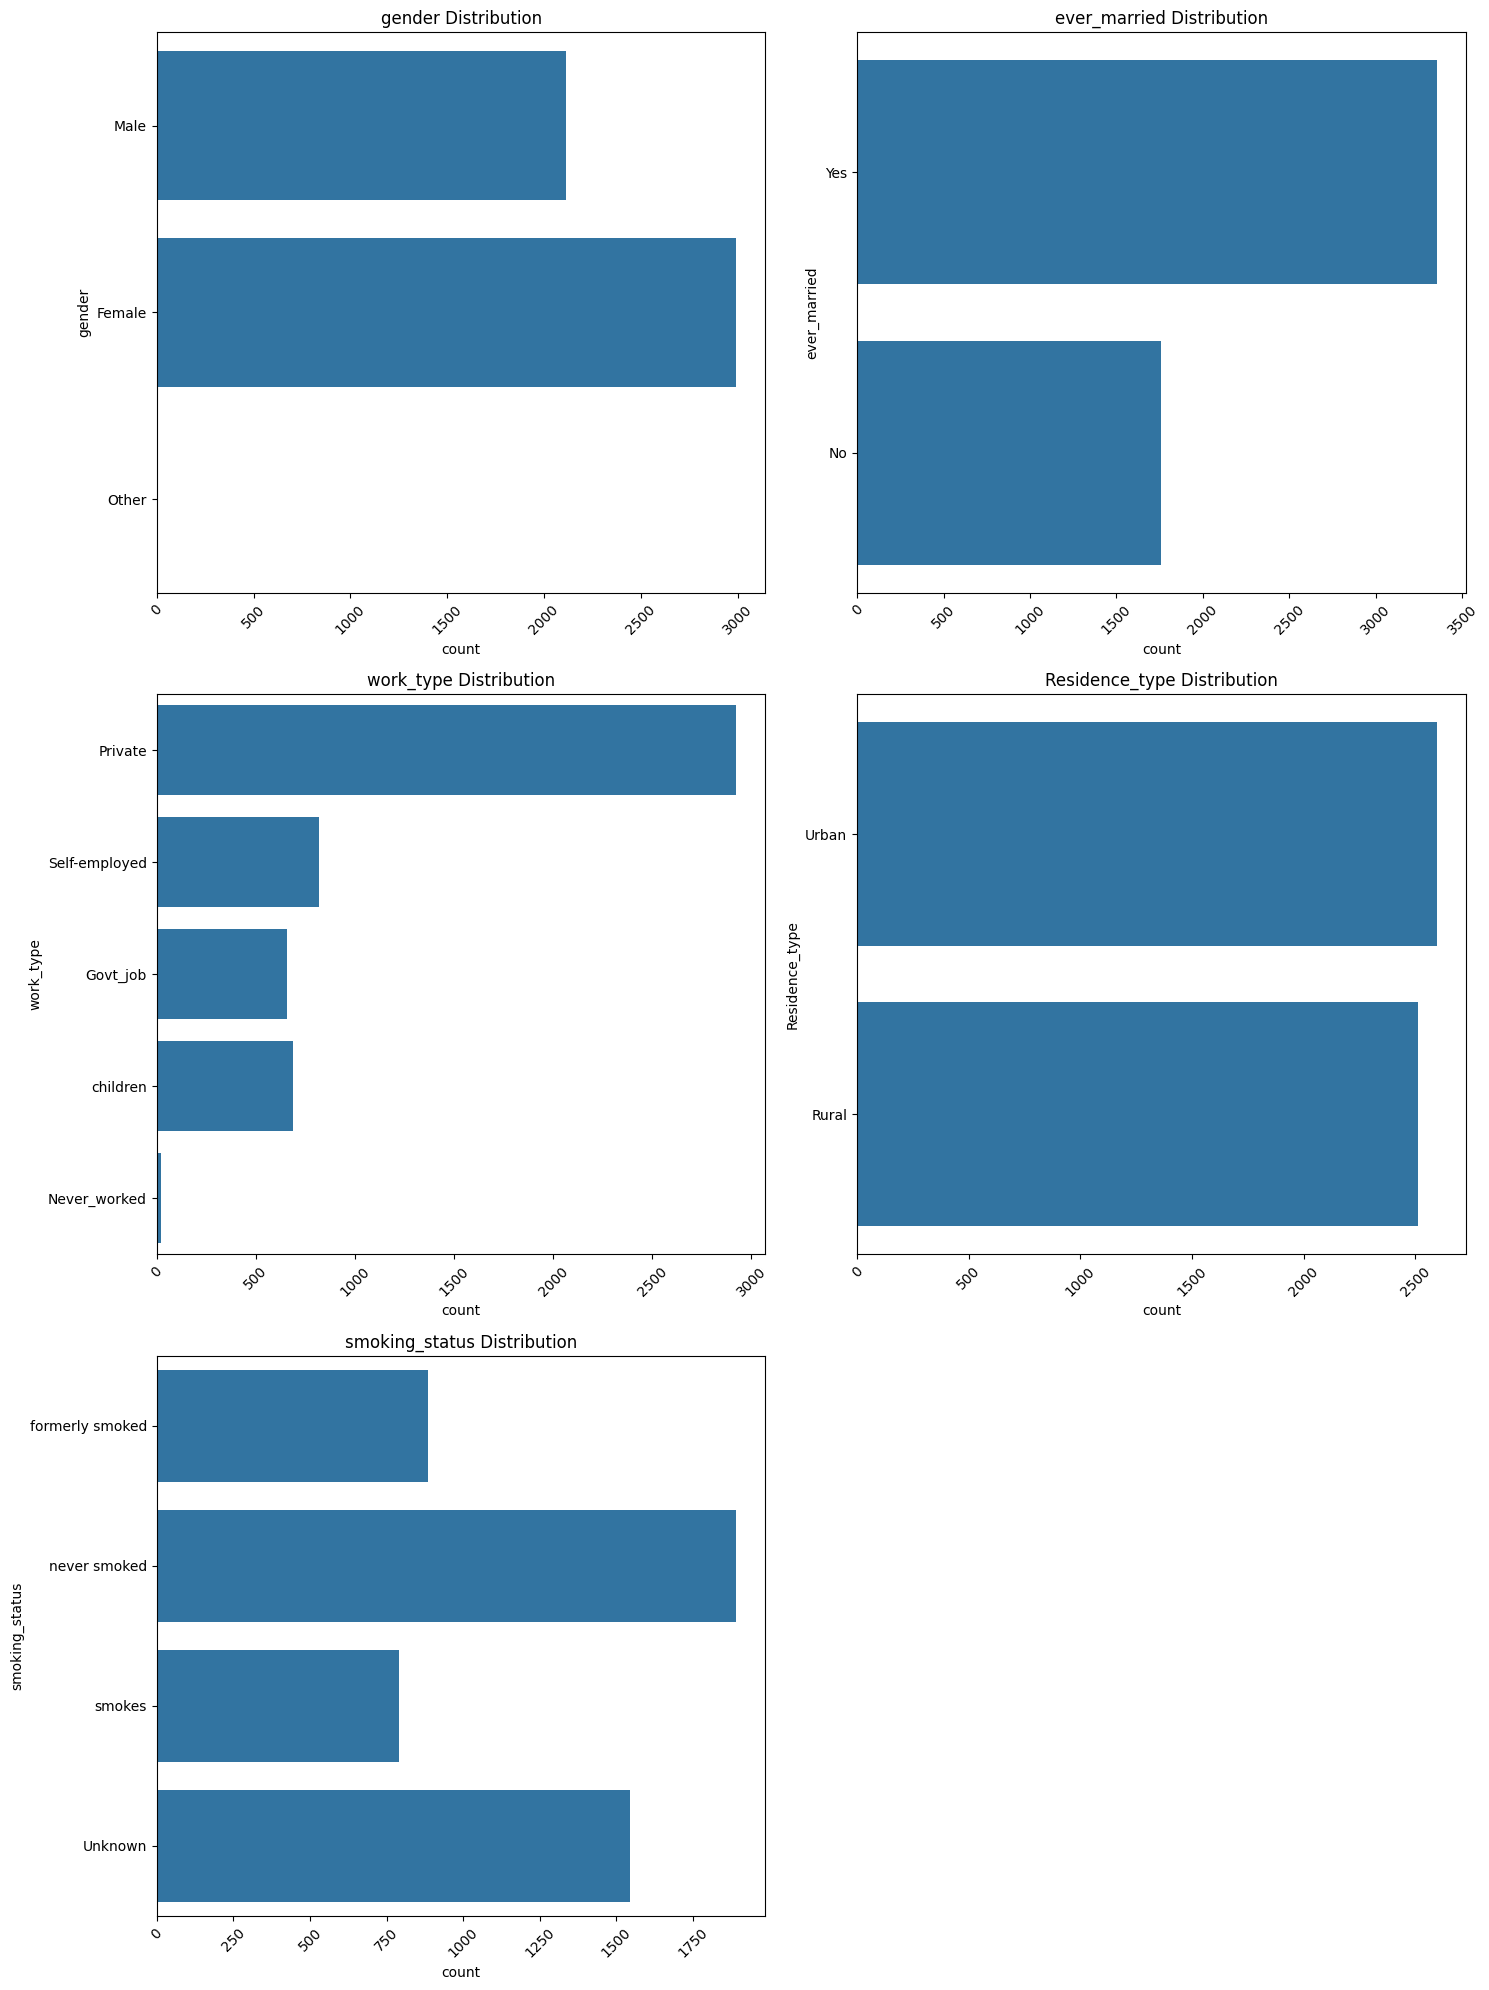

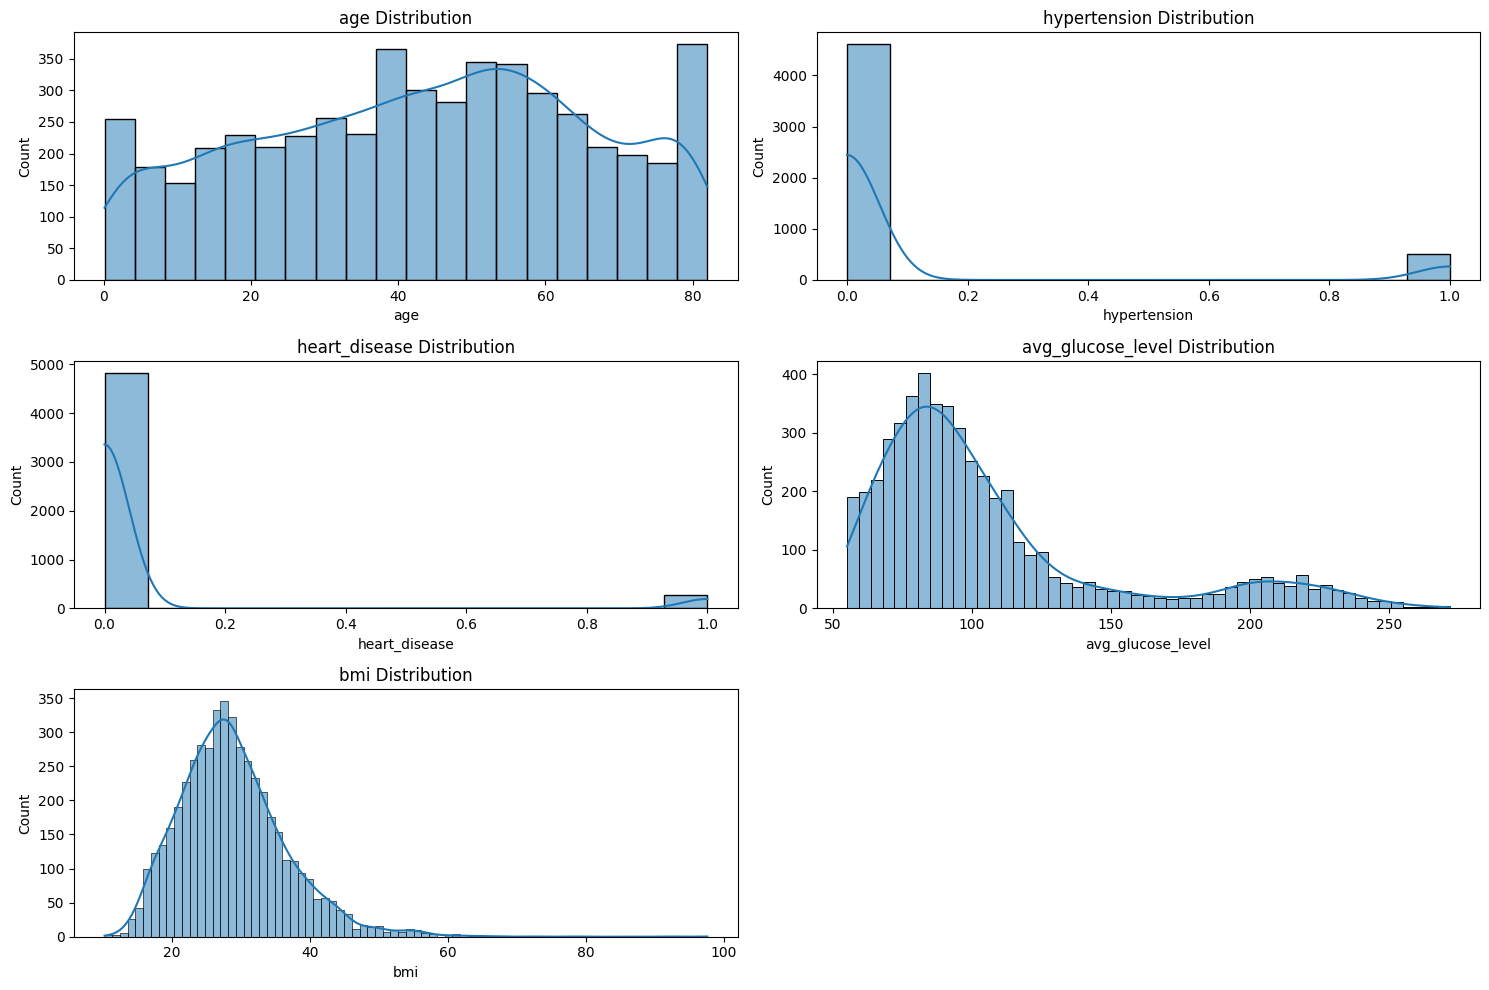

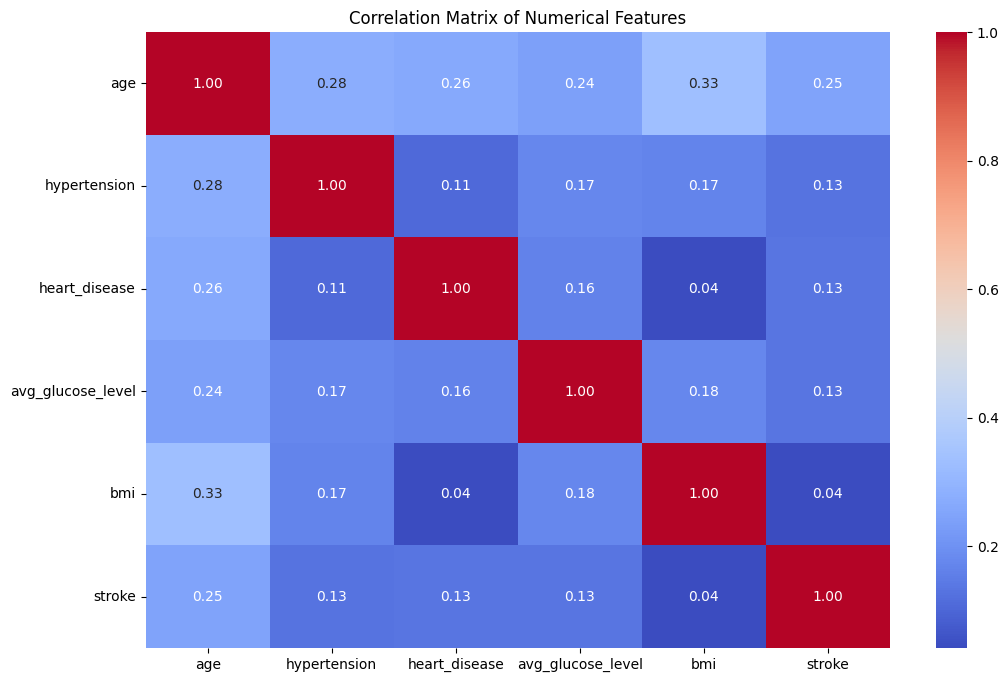

In [5]:
# Visualize target variable distribution
plt.figure(figsize=(10, 6))
sns.countplot(data['stroke'])
plt.title('Stroke Distribution')
plt.show()

# Visualize categorical feature distributions
categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
plt.figure(figsize=(15, 20))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data[feature])
    plt.title(f'{feature} Distribution')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Visualize numerical feature distributions
numeric_features = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
plt.figure(figsize=(15, 10))

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data[feature], kde=True)
    plt.title(f'{feature} Distribution')

plt.tight_layout()
plt.show()

# Exclude non-numeric columns for correlation matrix
numeric_columns = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
numeric_data = data[numeric_columns]

# Visualize numerical features correlation
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Handle missing values
imputer = SimpleImputer(strategy='mean')
data['bmi'] = imputer.fit_transform(data[['bmi']])

# Encode categorical variables
encoder = LabelEncoder()
data['gender'] = encoder.fit_transform(data['gender'])
data['ever_married'] = encoder.fit_transform(data['ever_married'])
data['work_type'] = encoder.fit_transform(data['work_type'])
data['Residence_type'] = encoder.fit_transform(data['Residence_type'])
data['smoking_status'] = encoder.fit_transform(data['smoking_status'])

# Feature selection
X = data.drop(['id', 'stroke'], axis=1)
y = data['stroke']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

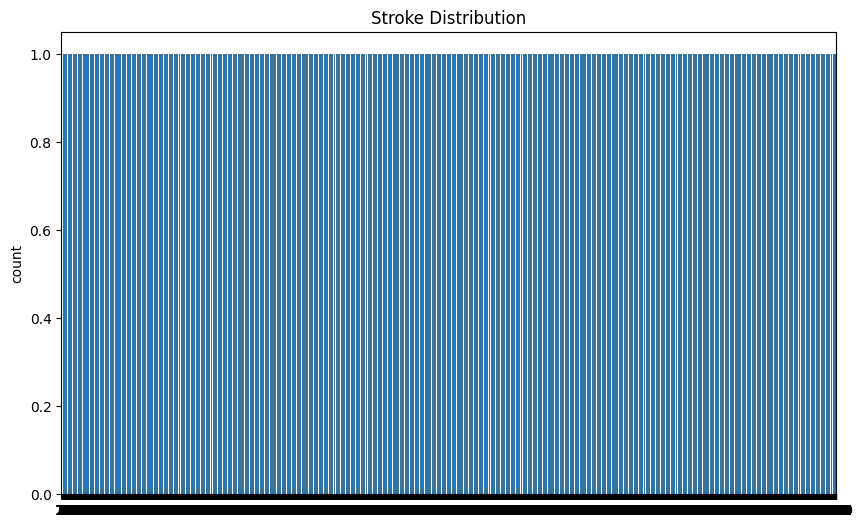

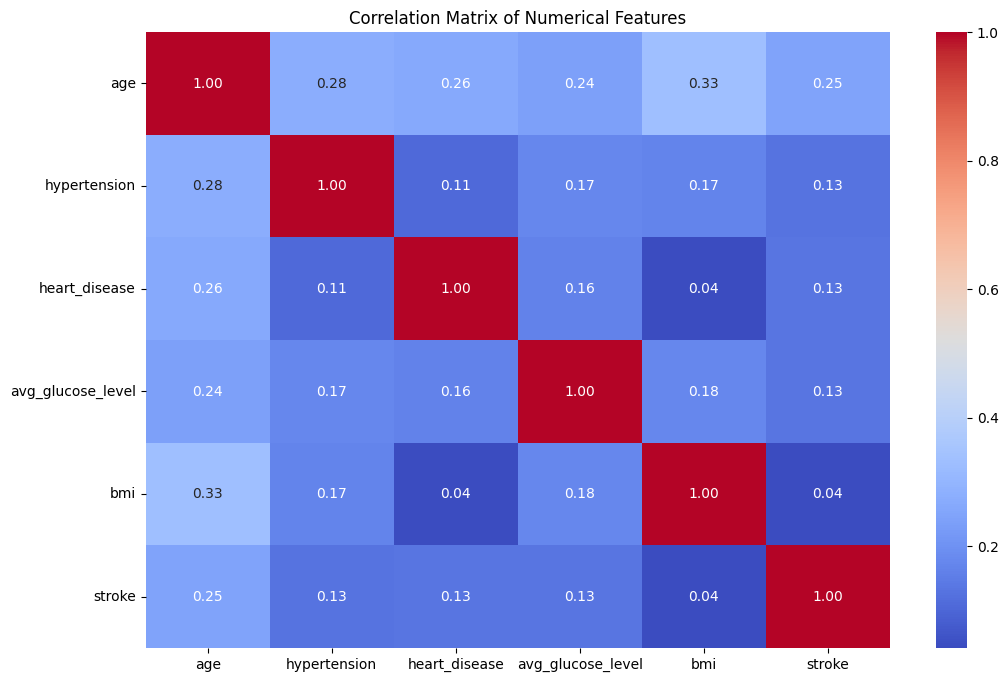

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load dataset
data = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

# Visualize data distribution
plt.figure(figsize=(10, 6))
sns.countplot(data['stroke'])
plt.title('Stroke Distribution')
plt.show()

# Exclude non-numeric columns for correlation matrix
numeric_columns = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
numeric_data = data[numeric_columns]

# Visualize numerical features correlation
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Handle missing values
imputer = SimpleImputer(strategy='mean')
data['bmi'] = imputer.fit_transform(data[['bmi']])

# Encode categorical variables
encoder = LabelEncoder()
data['gender'] = encoder.fit_transform(data['gender'])
data['ever_married'] = encoder.fit_transform(data['ever_married'])
data['work_type'] = encoder.fit_transform(data['work_type'])
data['Residence_type'] = encoder.fit_transform(data['Residence_type'])
data['smoking_status'] = encoder.fit_transform(data['smoking_status'])

# Feature selection
X = data.drop(['id', 'stroke'], axis=1)
y = data['stroke']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

--- Random Forest ---
Accuracy: 0.9383561643835616
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



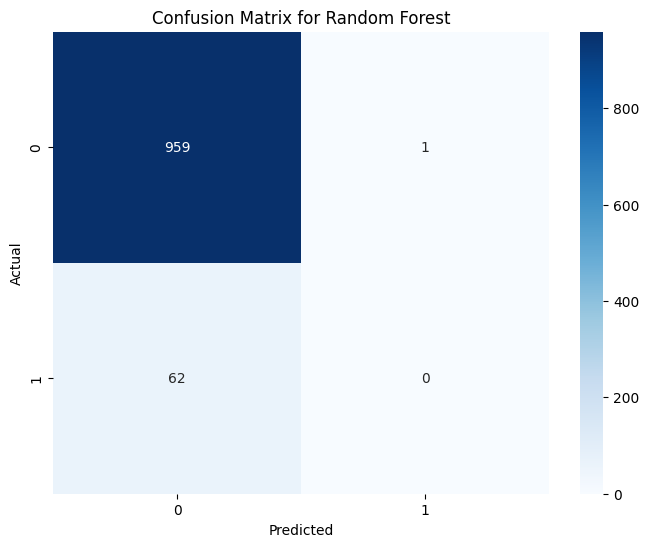

In [7]:
# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Print Random Forest performance
print(f'--- Random Forest ---')
print('Accuracy:', accuracy_rf)
print('Classification Report:\n', classification_report(y_test, y_pred_rf))

# Plot confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

--- Decision Tree ---
Accuracy: 0.910958904109589
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95       960
           1       0.20      0.16      0.18        62

    accuracy                           0.91      1022
   macro avg       0.58      0.56      0.57      1022
weighted avg       0.90      0.91      0.91      1022



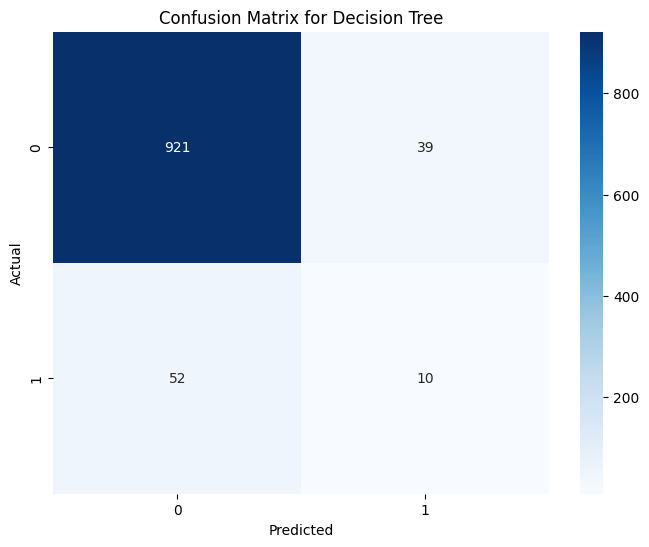

In [8]:
# Train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Print Decision Tree performance
print(f'--- Decision Tree ---')
print('Accuracy:', accuracy_dt)
print('Classification Report:\n', classification_report(y_test, y_pred_dt))

# Plot confusion matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

--- Naive Bayes ---
Accuracy: 0.8669275929549902
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.89      0.93       960
           1       0.22      0.47      0.30        62

    accuracy                           0.87      1022
   macro avg       0.59      0.68      0.61      1022
weighted avg       0.92      0.87      0.89      1022



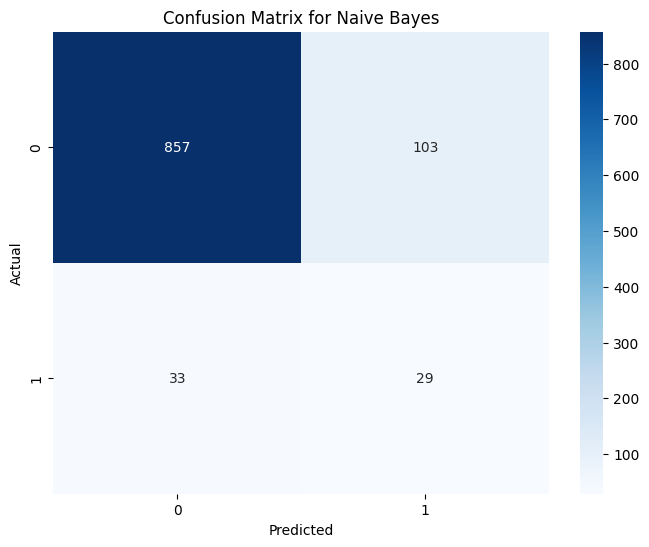

In [9]:
# Train Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)

# Print Naive Bayes performance
print(f'--- Naive Bayes ---')
print('Accuracy:', accuracy_nb)
print('Classification Report:\n', classification_report(y_test, y_pred_nb))

# Plot confusion matrix for Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:45:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


--- XGBoost ---
Accuracy: 0.9393346379647749
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97       960
           1       0.50      0.10      0.16        62

    accuracy                           0.94      1022
   macro avg       0.72      0.55      0.57      1022
weighted avg       0.92      0.94      0.92      1022



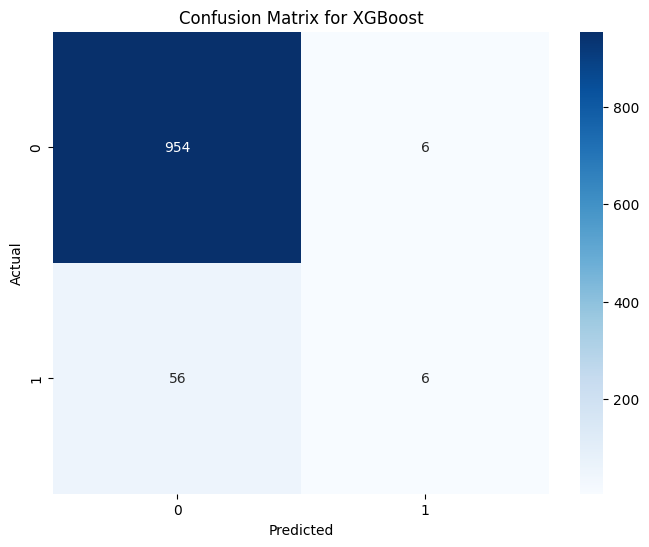

In [16]:
# Train XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

# Print XGBoost performance
print(f'--- XGBoost ---')
print('Accuracy:', accuracy_xgb)
print('Classification Report:\n', classification_report(y_test, y_pred_xgb))

# Plot confusion matrix for XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Correctly save the model
xgb_model.save_model('xgb_model.json')

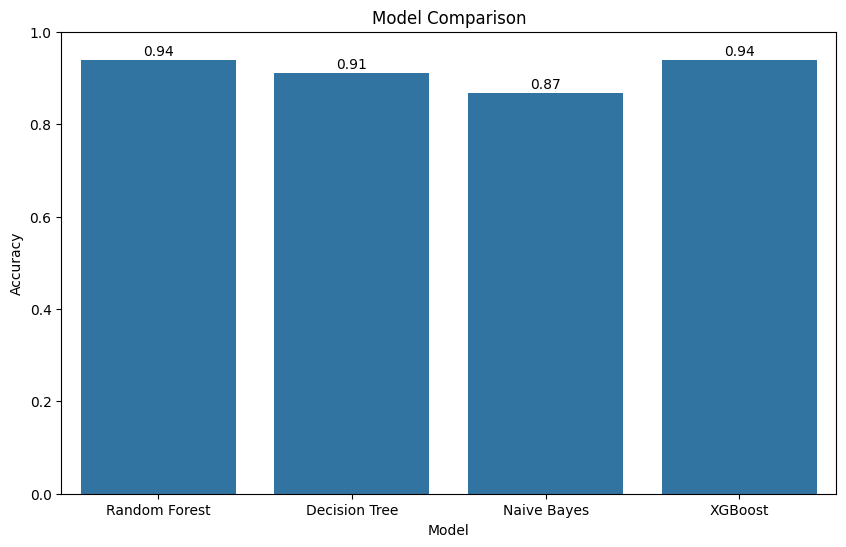

In [11]:
# Compare model accuracies
model_names = ['Random Forest', 'Decision Tree', 'Naive Bayes', 'XGBoost']
accuracies = [accuracy_rf, accuracy_dt, accuracy_nb, accuracy_xgb]

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies)
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i in range(len(accuracies)):
    plt.text(i, accuracies[i] + 0.01, f'{accuracies[i]:.2f}', ha='center')
plt.show()

In [13]:
pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 7.1 MB/s eta 0:00:00
  Attempting uninstall: tomlkit
    Found existing in

In [23]:
import gradio as gr
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBClassifier

# Load the trained model
model = XGBClassifier()
model.load_model('xgb_model.json')  # Load your trained model

# Function to predict stroke
def predict_stroke(gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status):
    input_data = pd.DataFrame({
        'gender': [gender],
        'age': [age],
        'hypertension': [hypertension],
        'heart_disease': [heart_disease],
        'ever_married': [ever_married],
        'work_type': [work_type],
        'Residence_type': [Residence_type],
        'avg_glucose_level': [avg_glucose_level],
        'bmi': [bmi],
        'smoking_status': [smoking_status]
    })

    # Perform preprocessing as needed (e.g., encoding, scaling)
    encoder = LabelEncoder()
    input_data['gender'] = encoder.fit_transform(input_data['gender'])
    input_data['ever_married'] = encoder.fit_transform(input_data['ever_married'])
    input_data['work_type'] = encoder.fit_transform(input_data['work_type'])
    input_data['Residence_type'] = encoder.fit_transform(input_data['Residence_type'])
    input_data['smoking_status'] = encoder.fit_transform(input_data['smoking_status'])

    scaler = StandardScaler()
    input_data = scaler.fit_transform(input_data)

    prediction = model.predict(input_data)
    return "Stroke Risk: Yes" if prediction[0] == 1 else "Stroke Risk: No"

# Set up Gradio interface
interface = gr.Interface(
    fn=predict_stroke,
    inputs=[
        gr.Dropdown(['Male', 'Female', 'Other'], label='Gender'),
        gr.Slider(0, 100, step=1, label='Age'),
        gr.Checkbox(label='Hypertension'),
        gr.Checkbox(label='Heart Disease'),
        gr.Dropdown(['Yes', 'No'], label='Ever Married'),
        gr.Dropdown(['Private', 'Self-employed', 'Govt_job', 'Children', 'Never_worked'], label='Work Type'),
        gr.Dropdown(['Urban', 'Rural'], label='Residence Type'),
        gr.Slider(0, 300, step=0.1, label='Avg Glucose Level'),
        gr.Slider(0, 100, step=0.1, label='BMI'),
        gr.Dropdown(['never smoked', 'formerly smoked', 'smokes', 'Unknown'], label='Smoking Status')
    ],
    outputs="text"
)

import gradio as gr
import pandas as pd
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the trained model
model = XGBClassifier()
model.load_model('xgb_model.json')

# Define the function to predict stroke and generate suggestions
def predict_and_suggest(gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status):
    input_data = pd.DataFrame({
        'gender': [gender],
        'age': [age],
        'hypertension': [hypertension],
        'heart_disease': [heart_disease],
        'ever_married': [ever_married],
        'work_type': [work_type],
        'Residence_type': [Residence_type],
        'avg_glucose_level': [avg_glucose_level],
        'bmi': [bmi],
        'smoking_status': [smoking_status]
    })

    # Encode categorical variables
    encoder = LabelEncoder()
    input_data['gender'] = encoder.fit_transform(input_data['gender'])
    input_data['ever_married'] = encoder.fit_transform(input_data['ever_married'])
    input_data['work_type'] = encoder.fit_transform(input_data['work_type'])
    input_data['Residence_type'] = encoder.fit_transform(input_data['Residence_type'])
    input_data['smoking_status'] = encoder.fit_transform(input_data['smoking_status'])

    # Standardize the numerical data
    scaler = StandardScaler()
    input_data = scaler.fit_transform(input_data)

    # Make prediction
    prediction = model.predict(input_data)
    stroke_risk = "Yes" if prediction[0] == 1 else "No"

    # Generate suggestions based on the prediction and input data
    suggestions = []
    if stroke_risk == "Yes":
        suggestions.append("Consider regular check-ups with a cardiologist.")
        suggestions.append("Maintain a balanced diet and monitor your glucose levels.")
        suggestions.append("Engage in regular physical activity to manage BMI.")
        if smoking_status in ['formerly smoked', 'smokes']:
            suggestions.append("Quitting smoking can significantly reduce your stroke risk.")
    else:
        suggestions.append("Continue maintaining a healthy lifestyle.")
        suggestions.append("Monitor your health regularly to prevent future risks.")

    return f"Stroke Risk: {stroke_risk}", "\n".join(suggestions)

# Set up Gradio interface
def predict_and_suggest(gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status):
    # Your prediction and suggestion logic here

    # For now, we will just return placeholders
    prediction = "Stroke Risk: Yes" if np.random.rand() > 0.5 else "Stroke Risk: No"
    suggestion = "Suggestion: Maintain a healthy lifestyle" if prediction == "Stroke Risk: Yes" else "Suggestion: Keep up the good work!"

    return prediction, suggestion

# Set up Gradio interface
interface = gr.Interface(
    fn=predict_and_suggest,
    inputs=[
        gr.Dropdown(['Male', 'Female', 'Other'], label='Gender'),
        gr.Slider(0, 100, step=1, label='Age'),
        gr.Checkbox(label='Hypertension'),
        gr.Checkbox(label='Heart Disease'),
        gr.Dropdown(['Yes', 'No'], label='Ever Married'),
        gr.Dropdown(['Private', 'Self-employed', 'Govt_job', 'Children', 'Never_worked'], label='Work Type'),
        gr.Dropdown(['Urban', 'Rural'], label='Residence Type'),
        gr.Slider(0, 300, step=0.1, label='Avg Glucose Level'),
        gr.Slider(0, 100, step=0.1, label='BMI'),
        gr.Dropdown(['never smoked', 'formerly smoked', 'smokes', 'Unknown'], label='Smoking Status')
    ],
    outputs=["text", "text"]  # Two outputs: prediction and suggestion
)

# Launch the interface
interface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://400bffa1448a3ad420.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
